# ライブラリ＆データの準備

In [13]:
import numpy as np
import pandas as pd
import scipy

from sklearn.model_selection import train_test_split 

## 分類問題用データ読み込み

In [14]:
#分類タスク用データ
df_class = pd.read_excel("2-3_従業員データ.xlsx")

#説明変数と目的変数に分離
y = df_class["Result"]
X = df_class[["年次", "月給(万円)", "管理職", "社員満足度"]]

#学習用とテスト用に分離
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3,stratify=y
)


## 回帰問題用データ読み込み

In [39]:
#回帰タスク用データ
df_reg = pd.read_excel("2-3_家賃データ.xlsx")

#説明変数と目的変数に分離
y = df_reg["Result"]
X = df_reg[["平米", "築年数", "首都圏", "最寄駅からの距離"]]

#学習用とテスト用に分離
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2
)


# モデル構築

## 分類問題

In [19]:
#決定木
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
#SVM
from sklearn.svm import SVC
model = SVC()

model.fit(X_train,y_train)

SVC()

In [17]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
#勾配ブースティング
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

model.fit(X_train,y_train)

GradientBoostingClassifier()

## 回帰問題

In [30]:
#決定木
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

model.fit(X_train,y_train)

DecisionTreeRegressor()

In [24]:
#SVM
from sklearn.svm import SVR
model = SVR()

model.fit(X_train,y_train)

SVR()

In [25]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X_train,y_train)

RandomForestRegressor()

In [40]:
#勾配ブースティング
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

model.fit(X_train,y_train)

GradientBoostingRegressor()

# モデルの評価

##　分類問題

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#予測の実行
y_pred = model.predict(X_test)

#混同行列
cm = confusion_matrix(y_test, y_pred)

#各種評価値
cr = classification_report(y_test, y_pred, output_dict=True)

pd.DataFrame(cr)

,0,1,accuracy,macro avg,weighted avg
precision,0.814815,0.476190,0.72,0.645503,0.724515
recall,0.800000,0.500000,0.72,0.650000,0.720000
f1-score,0.807339,0.487805,0.72,0.647572,0.722130
support,110.000000,40.000000,0.72,150.000000,150.000000


In [27]:
#関数化
def get_all_result(model_name,X_train,y_train,X_test,y_test):
    
    if model_name == "tree":
        model = DecisionTreeClassifier(class_weight='balanced')
    elif model_name == "svm":
        model = SVC(class_weight='balanced')
    elif model_name == "rf":
        model = RandomForestClassifier(class_weight='balanced')
    elif model_name == "gb":
        model = GradientBoostingClassifier()

    #モデル構築        
    model.fit(X_train,y_train)
    
    #予測の実行
    y_pred = model.predict(X_test)
    
    #精度
    cr = classification_report(y_test, y_pred, output_dict=True)
    
    return cr["macro avg"]["f1-score"]

## 回帰問題

In [28]:
from sklearn.metrics import mean_squared_error

#予測の実行
y_pred = model.predict(X_test)

#2乗誤差
MSE = mean_squared_error(y_test,y_pred)

MSE

0.18127297509503557

# モデルの可視化

##　決定木

In [21]:
import cython
from dtreeviz.trees import dtreeviz
import graphviz

/Users/t.nishimaki/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


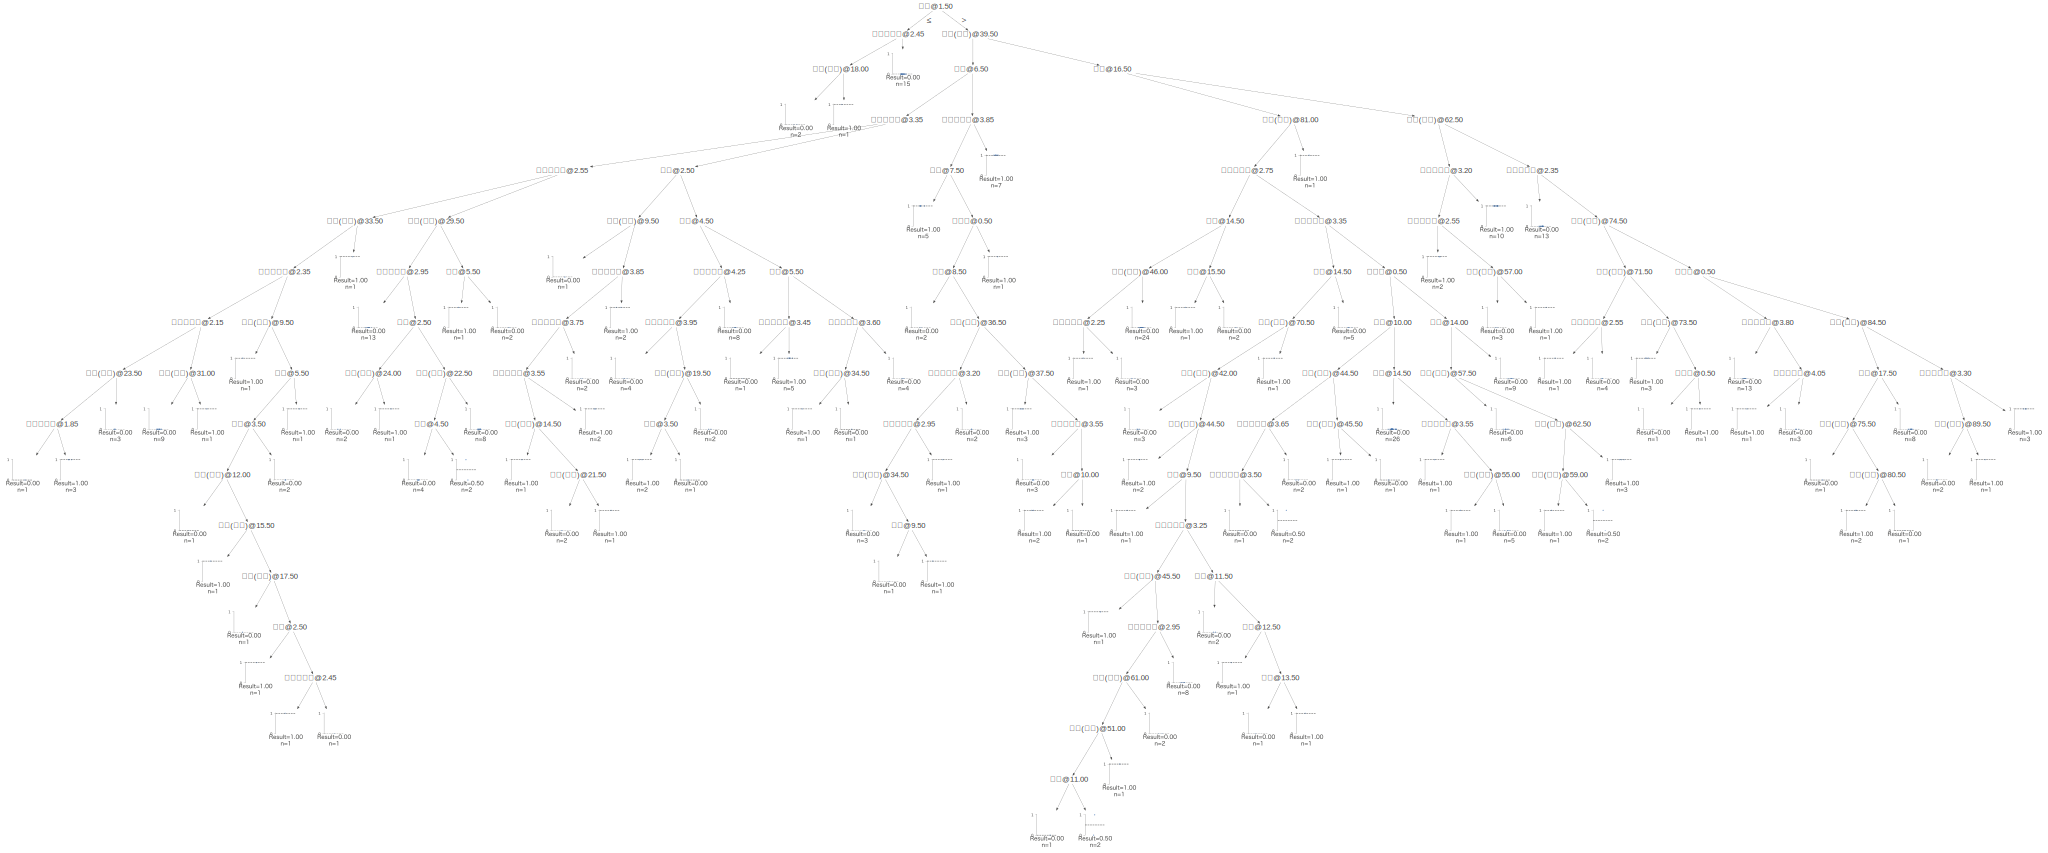

In [31]:
#結果の可視化
viz = dtreeviz(model,X_train,y_train,
               target_name = "Result",
               feature_names = ["年次", "月給(万円)", "管理職", "社員満足度"],
               class_names = ["在籍","退職"],
               fontname = "Hiragino Maru Gothic Pro",
               fancy = False
              )
viz

## Feature Importance

In [32]:
import seaborn as sns

<Axes: xlabel='Importance', ylabel='Feature'>

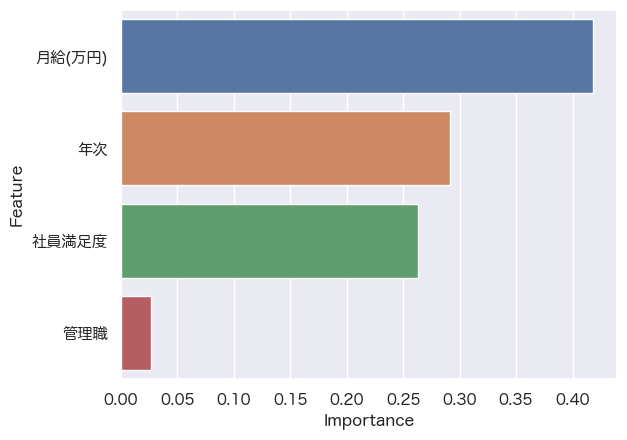

In [33]:
# モデルの特徴量の重要度を取得する
fi = model.feature_importances_

# 特徴量の重要度をデータフレームに格納し、降順にソート
df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': fi
}).sort_values(by='Importance', ascending=False)

# 棒グラフの描画
sns.set(font="Hiragino Maru Gothic Pro")
sns.barplot(data=df,x="Importance",y="Feature")

# 予測

## 分類問題

In [36]:
df_class_p = pd.read_excel("2-3_従業員データ_予測用.xlsx")

df_class_p_X = df_class_p[["年次", "月給(万円)", "管理職", "社員満足度"]]

pred = model.predict(df_class_p_X)
pred_proba = model.predict_proba(df_class_p_X)

df_class_p["予測結果"] = pred
df_class_p["退職確率"] = pred_proba[:,1]

In [42]:
df_class_p

,社員番号,年次,月給(万円),管理職,社員満足度,予測結果,退職確率
0,E394502,10,42,0,3.7,0,0.236061
1,E019192,5,30,0,4.1,0,0.458053
2,E100493,1,22,0,4.2,0,0.098825
3,E995840,22,67,1,3.8,0,0.186121
4,E295101,4,24,0,3.6,0,0.184337
5,E124391,15,56,1,2.9,0,0.128269
6,E888933,3,19,0,4.2,0,0.398343
7,E653222,6,25,0,4.3,1,0.618151
8,E450123,12,40,0,4.1,0,0.228117
9,E103911,9,34,0,2.9,1,0.510027


## 回帰問題

In [41]:
df_reg_p = pd.read_excel("2-3_家賃データ_予測用.xlsx")

df_reg_p_X = df_reg_p[["平米", "築年数", "首都圏", "最寄駅からの距離"]]

pred = model.predict(df_reg_p_X)

df_reg_p["予測結果"] = pred


In [43]:
df_reg_p

,住宅番号,平米,築年数,首都圏,最寄駅からの距離,予測結果
0,#1,67,10,0,5,16.846543
1,#2,53,6,0,20,12.917255
2,#3,85,4,1,7,28.158308
3,#4,27,28,0,6,7.306820
4,#5,101,6,0,5,26.132586
5,#6,75,21,0,19,15.174010
6,#7,54,5,1,11,19.188691
7,#8,65,1,1,17,21.903857
8,#9,36,0,0,10,12.647223
9,#10,28,3,0,8,11.163979
